In [10]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab
import matplotlib.pyplot as plt
sys.path.append('/project/bioinformatics/DLLab/Alex/Projects/utilities/')
import network_functions as nf
import re
#from machine_learning_stats import metrics_from_confusion_matrix
#import tensorflow_utilities
import seaborn as sns
from sklearn.neighbors import KernelDensity
import scipy.stats
from scipy import stats
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools
import seaborn as sns
import pickle as pkl
import numpy as np

In [3]:
# # The performance of the models are needed for this
# arrModels = [x for x in os.listdir('output') if 'model' in x]
# listPerformance = []
# for model in arrModels:
#     model_num = int(re.findall('[0-9]+', model)[0])
#     try:
#         arrValidationConfusionMatrixFile = [x for x in os.listdir('output/%s/confusion_matrices'%model) if 'validation' in x]
#         #The file is labeled as test, but its actiually the validation data! (check the code)
#     except:
#         continue
    
#     arrMetrics = []
#     listSensitivity = []
#     listSpecificity = []
#     dfPerformence = pd.DataFrame()
#     for strCMFile in arrValidationConfusionMatrixFile:
#         intFold = int(re.findall('[0-9]+',strCMFile)[0])
#         strPath = 'output/%s/confusion_matrices/%s'%(model,strCMFile)
#         dfConfusionMatrix = pd.read_csv(strPath, index_col=0)
#         arr2DConfusionMatrix=np.array(dfConfusionMatrix)
#         pdsPerformanceMetrics = metrics_from_confusion_matrix(arr2DConfusionMatrix)
#         pdsPerformanceMetrics['F1_macro'] = pdsPerformanceMetrics['F1_macro']
#         pdsPerformanceMetrics.name = intFold
#         dfPerformence = dfPerformence.append(pdsPerformanceMetrics)
#     listPerformance.append([model, dfPerformence])

/project/bioinformatics/DLLab/Alex/Projects/utilities/machine_learning_stats.py:26: RuntimeWarning: invalid value encountered in true_divide
  macro_precision = np.nan_to_num((tp/(tp+fp)))
/project/bioinformatics/DLLab/Alex/Projects/utilities/machine_learning_stats.py:31: RuntimeWarning: invalid value encountered in true_divide
  pdsMetrics['F1_macro'] = np.mean(np.nan_to_num(2*(macro_precision*macro_recall)/(macro_precision+macro_recall)))


In [11]:
#Pickled file to load should be in format:
#nparray([model1, performance1],[model2, performance2],...,[modelN, performanceN])
sFileLoc='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/pdDLPerformance.p'
pdPerformance=pkl.load(open(sFileLoc, 'rb'))

In [4]:
# # sort by the lower value of the average specificity and sensitivity
# def fSortByF1(x):
#     F1 = np.mean(x[1]['F1_macro'])-(1.96*np.std(x[1]['F1_macro']))
#     return F1
# listPerformance.sort(key = fSortByF1, reverse=True)
# listPerformance = listPerformance[28:]

In [29]:
pdPerformance=pdPerformance.sort_values(by='Combined Anatomical Volumetric Data and Connectivity with the BASC Atlas with 122 Parcellations')
pdPerformance['Model Number'] =pdPerformance.index
pdPerformance

,Combined Anatomical Volumetric Data and Connectivity with the BASC Atlas with 122 Parcellations,Model Number
44,0.5,44
31,0.5,31
24,0.563853,24
20,0.604317,20
38,0.654822,38
19,0.656325,19
37,0.65849,37
49,0.660173,49
11,0.667689,11
9,0.683021,9


In [54]:
import math
def fCountHidden(config = None , iModel = None):
    if config == None:
        config = nf.read_config_file('IniFiles/Dense_{0:02d}.ini'.format(iModel))
    intHidden = [xi for xi in config.keys() if 'dense' in xi.lower()].__len__()
    return intHidden

def fDropout(config = None ,iModel = None):
    if config == None:
        config = nf.read_config_file('IniFiles/Dense_{0:02d}.ini'.format(iModel))
    flDropout = float(config['layer/Dropout0']['rate'])
    return(flDropout)

def fBottomLayerSizeLog2(config = None ,iModel = None):
    if config == None:
        config = nf.read_config_file('IniFiles/Dense_{0:02d}.ini'.format(iModel))
    intLayerSize = int(config['layer/input']['units'])
    
    return(math.log(intLayerSize, 2.0))

def fRegularization(config = None ,iModel = None):
    if config == None:
        config = nf.read_config_file('IniFiles/Dense_{0:02d}.ini'.format(iModel))
    flRegularization = float(config['layer/input']['regularizer'])
    return(flRegularization)

In [49]:
import math
math.log(32, 2.0)

5.0

In [5]:
# # functions to interigate the ini files
# def fGetActivation(config = None ,model = None):
#     if config == None:
#         config = nf.read_config_file(f'models/{model}/spatial.ini')
#     try:
#         strActivationKey = [xi for xi in config.keys() if 'activator' in xi][0]
#     except IndexError:
#         return 'ReLU'
#     return config[strActivationKey]['class']

# def fBinarizeActivation(strActivation):
#     if strActivation == 'ReLU':
#         return 0
#     elif strActivation == 'PReLU':
#         return 1
#     else:
#         return None

# def fNumberOf2DConv(config = None ,model = None):
#     if config == None:
#         config = nf.read_config_file(f'models/{model}/spatial.ini')
#     intCovnLayers = [xi for xi in config.keys() if 'conv' in xi].__len__()
#     return intCovnLayers

# def fNumberOf1DConv(config = None ,model = None):
#     if config == None:
#         config = nf.read_config_file(f'models/{model}/temporal.ini')
#     intCovnLayers = [xi for xi in config.keys() if 'conv' in xi].__len__()
#     return intCovnLayers

# def fNumberOfDense(config = None ,model = None):
#     if config == None:
#         config = nf.read_config_file(f'models/{model}/merge.ini')
#     intCovnLayers = [xi for xi in config.keys() if 'dense' in xi.lower()].__len__()
#     return intCovnLayers

# def fDropout(config = None ,model = None):
#     if config == None:
#         config = nf.read_config_file(f'models/{}/merge.ini')
#     intDropoutLayers = [xi for xi in config.keys() if 'dropout' in xi.lower()].__len__()
#     return(intDropoutLayers)

# def fBatchNorm(config):
#     try:
#         bBatchNorm = bool([xi for xi in config.keys() if 'batch' in xi.lower()].__len__())
#     except IndexError:
#         return None
#     return bBatchNorm

In [6]:
dfModelMetrics = pd.DataFrame(index = [x[0] for x in listPerformance])
dfModelMetrics['F1'] = [np.mean(x[1]['F1_macro'])-(1.96*np.std(x[1]['F1_macro'])) for x in listPerformance]
for strSub in ['spatial', 'temporal','merge']:
    dfModelMetrics[f'{strSub}_config'] = [nf.read_config_file(f'models/{model}/{strSub}.ini') for model in dfModelMetrics.index]

In [36]:

pdPerformance['Model Number'].apply(lambda x: fRegularization(iModel=x))

44    0.008706
31    0.000406
24    0.004623
20    0.008706
38    0.008706
19    0.008706
37    0.000382
49    0.008706
11    0.001121
9     0.000231
14    0.000266
3     0.004623
41    0.004623
8     0.004623
27    0.000231
46    0.000382
0     0.000231
1     0.000231
13    0.000266
21    0.000231
34    0.000110
17    0.000233
45    0.000231
5     0.000731
6     0.000231
48    0.000731
25    0.000231
42    0.000231
30    0.000110
43    0.001121
7     0.000110
35    0.000233
33    0.000231
16    0.000231
28    0.000382
29    0.000382
26    0.000406
23    0.000382
32    0.000231
12    0.000233
22    0.000382
4     0.000406
15    0.000110
40    0.000110
36    0.000231
18    0.000233
10    0.001121
2     0.000233
39    0.000110
47    0.000731
Name: Model Number, dtype: float64

In [55]:
pdPerformance['Log2 Bottom Layer Size'] = pdPerformance['Model Number'].apply(lambda x: fBottomLayerSizeLog2(iModel=x))
pdPerformance['Dropout']=pdPerformance['Model Number'].apply(lambda x: fDropout(iModel=x))
pdPerformance['Hidden Layers']=pdPerformance['Model Number'].apply(lambda x: fCountHidden(iModel=x))
pdPerformance['Regularization'] =pdPerformance['Model Number'].apply(lambda x: fRegularization(iModel=x))

In [7]:
# dfModelMetrics['Activation'] = dfModelMetrics['spatial_config'].apply(lambda x: fGetActivation(x))
# dfModelMetrics['Activation_Binary'] = dfModelMetrics['Activation'].apply(lambda x: fBinarizeActivation(x))
# dfModelMetrics['no2DConv'] = dfModelMetrics['spatial_config'].apply(lambda x: fNumberOf2DConv(x))
# dfModelMetrics['no1DConv'] = dfModelMetrics['temporal_config'].apply(lambda x: fNumberOf2DConv(x))
# dfModelMetrics['noDense'] = dfModelMetrics['merge_config'].apply(lambda x: fNumberOfDense(x))
# dfModelMetrics['Dropout'] = dfModelMetrics['merge_config'].apply(lambda x: fDropout(x))
# dfModelMetrics['BatchNormSpatial'] = dfModelMetrics['spatial_config'].apply(lambda x: fBatchNorm(x))
# dfModelMetrics['BatchNormTemporal'] = dfModelMetrics['temporal_config'].apply(lambda x: fBatchNorm(x))

In [56]:
pdPerformance.head()

,Combined Anatomical Volumetric Data and Connectivity with the BASC Atlas with 122 Parcellations,Model Number,Bottom Layer Size,Dropout,Hidden Layers,Regularization,Log2 Bottom Layer Size
44,0.5,44,256,0.400558,3,0.008706,8.0
31,0.5,31,128,0.575357,2,0.000406,7.0
24,0.563853,24,128,0.454036,4,0.004623,7.0
20,0.604317,20,32,0.178009,4,0.008706,5.0
38,0.654822,38,128,0.129042,4,0.008706,7.0


In [227]:
def fPlot2DDist(X, Y, Zs, colors, cmaps, title, xlabel, ylabel):
    fig = plt.figure(figsize=(10,6))
    #plt.suptitle(title)
    ax = fig.add_subplot(1,1,1,projection='3d')

#     ax1 = fig.add_subplot(2,2,1,projection='3d')
#     ax2 = fig.add_subplot(2,2,2,projection='3d')
#     ax3 = fig.add_subplot(2,2,3,projection='3d')
#     ax4 = fig.add_subplot(2,2,4,projection='3d')
#     for ax in [ax1,ax2,ax3,ax4]:
#         ax.view_init(30, 30)
#         ax.set_ylabel(ylabel)
#         ax.set_xlabel(xlabel)
    ax.view_init(30, 30)
    #ax.set_ylabel(ylabel)
    #ax.set_xlabel(xlabel)
    fig.tight_layout()

    colors = ['Green','Red']
    cmaps = ['Greens','Reds']
    for Zi, Ci, CMi in zip(Zs, colors, cmaps):
        ax.contour3D(X, Y, Zi, 30, cmap=CMi)
#         ax1.contour3D(X, Y, Zi, 30, cmap=CMi)
#         ax2.plot_surface(X, Y, Zi, rstride=10, cstride=10, alpha=0.5, cmap=CMi)
#         cset = ax2.contour(X, Y, Zi, zdir='z', offset=Zi.min(), cmap=CMi)
#         ax3.plot_surface(X, Y, Zi, rstride=10, cstride=10, alpha=0.5, cmap=CMi)
        #cset = ax.contour(X, Y, Zi, zdir='z', offset=Zi.min(), cmap=CMi)
        cset = ax.contour(X, Y, Zi, zdir='x', offset=X.min(), cmap=CMi)
        cset = ax.contour(X, Y, Zi, zdir='y', offset=Y.min(), cmap=CMi)
#         ax4.plot_wireframe(X, Y, Zi, rcount=15, ccount=15, cmap='Reds', color=Ci)
    plt.show()
        
def plt2DKDEs(dfModelMetrics, lComparison, flPercent):
    topModels = dfModelMetrics.head(int(dfModelMetrics.shape[0]*(flPercent/100.)))
    bottomModels = dfModelMetrics.tail(int(dfModelMetrics.shape[0]*(flPercent/100.)))
    
    Zdata  = [np.array(topModels[lComparison]),np.array(bottomModels[lComparison])]
    xmin = np.min([Zi[:,0].min() for Zi in Zdata])*.8
    xmax = np.max([Zi[:,0].max() for Zi in Zdata])*1.2
    ymin = np.min([Zi[:,1].min() for Zi in Zdata])*.8
    ymax = np.max([Zi[:,1].max() for Zi in Zdata])*1.2
    X, Y = np.mgrid[xmin:xmax:100j, 
                    ymin:ymax:100j]
    kdes = [KernelDensity(kernel='gaussian', bandwidth=1).fit(Zi) for Zi in Zdata]
    Z = [np.exp(kde.score_samples(np.dstack([X.flatten(),Y.flatten()])[0]).reshape(*X.shape)) for kde in kdes]

    fPlot2DDist(X, Y, Z, ['Green','Red'], ['Greens','Reds'], ' vs '.join(lComparison), lComparison[0], lComparison[1])
    

In [58]:
pdPerformance.columns.tolist()

['Combined Anatomical Volumetric Data and Connectivity with the BASC Atlas with 122 Parcellations',
 'Model Number',
 'Bottom Layer Size',
 'Dropout',
 'Hidden Layers',
 'Regularization',
 'Log2 Bottom Layer Size']

In [59]:
lToTest = [ 'Log2 Bottom Layer Size', 'Dropout', 'Hidden Layers', 'Regularization']

<IPython.core.display.Javascript object>


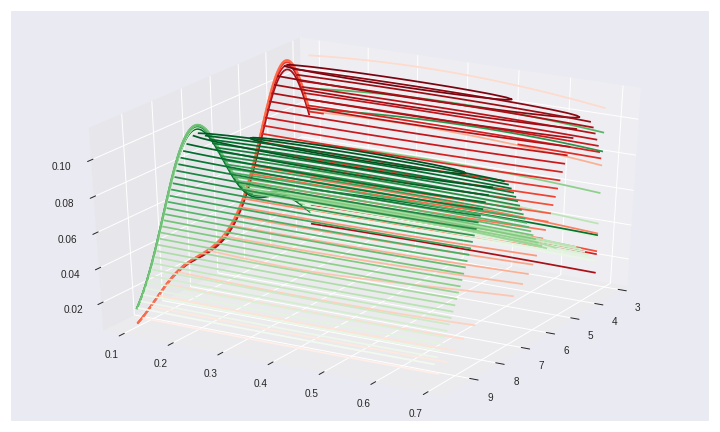

<IPython.core.display.Javascript object>


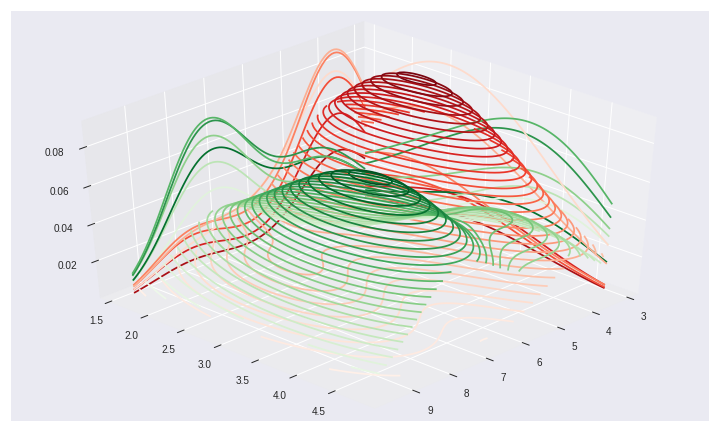

<IPython.core.display.Javascript object>


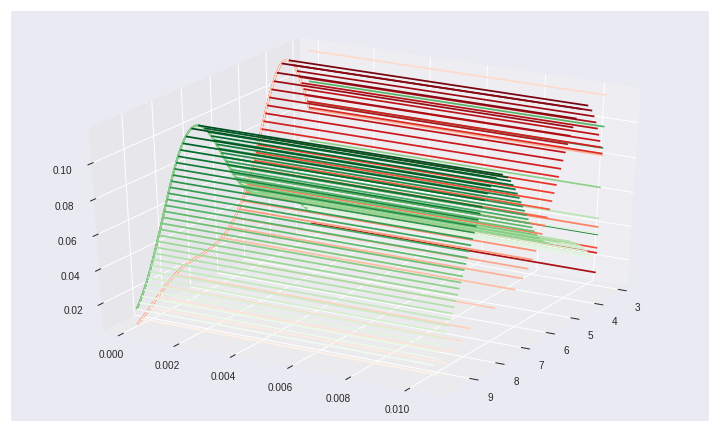

<IPython.core.display.Javascript object>


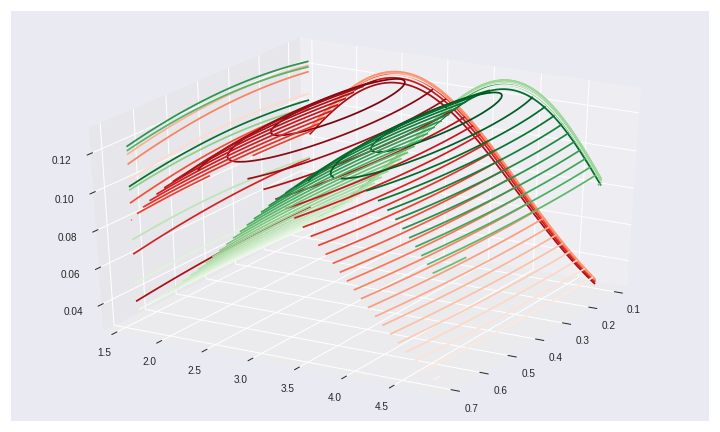

<IPython.core.display.Javascript object>


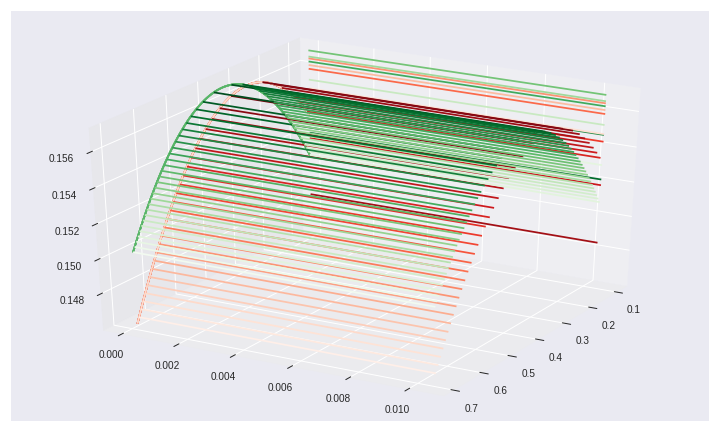

<IPython.core.display.Javascript object>


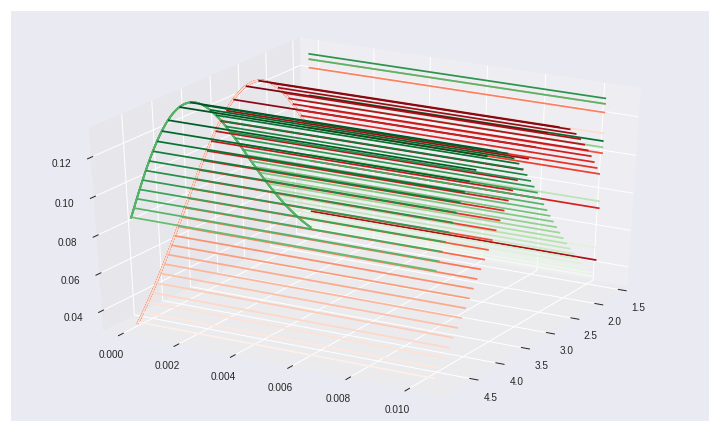

In [228]:
%matplotlib notebook
plt.style.use('seaborn')
for lComparison in itertools.combinations(lToTest, 2):
    plt2DKDEs(pdPerformance,list(lComparison), 15)
    plt.savefig(f'/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/KDEs/{lComparison}.png')

<IPython.core.display.Javascript object>


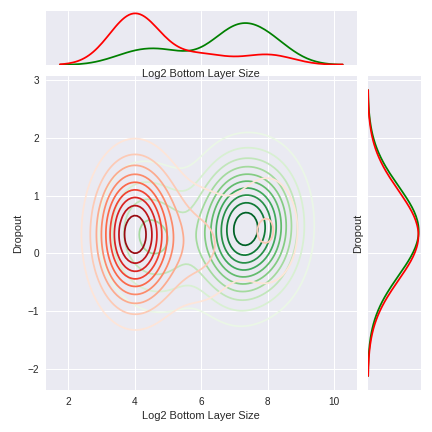

<IPython.core.display.Javascript object>


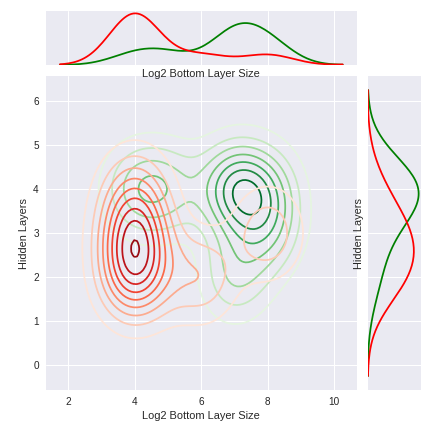

<IPython.core.display.Javascript object>


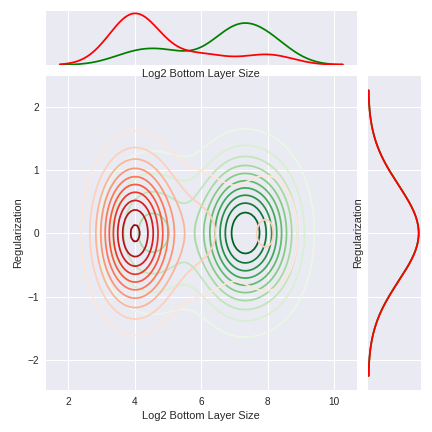

<IPython.core.display.Javascript object>


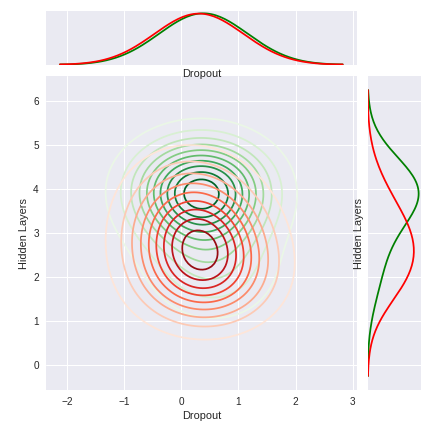

<IPython.core.display.Javascript object>


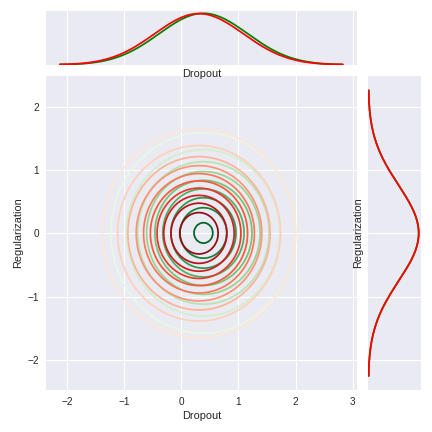

<IPython.core.display.Javascript object>


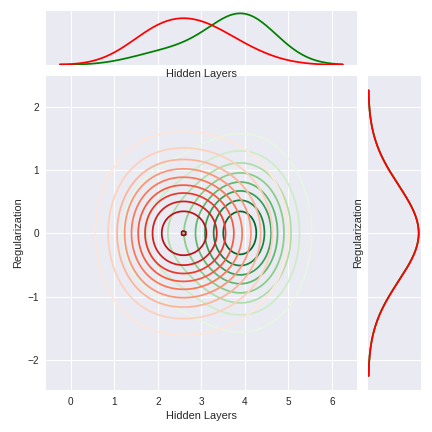

In [156]:
dfModelMetrics=pdPerformance
for x,y in itertools.combinations(lToTest, 2):
    #x,y = 'no2DConv', 'no1DConv'
    bw = .75
    topModels = dfModelMetrics.head(int(dfModelMetrics.shape[0]*.15)).dropna()
    bottomModels = dfModelMetrics.tail(int(dfModelMetrics.shape[0]*.15)).dropna()

    g = sns.JointGrid(x=x, y=y, data=dfModelMetrics)
    sns.kdeplot(topModels[x], topModels[y], cmap="Greens", shade=False, shade_lowest=False, ax=g.ax_joint, bw = bw)
    sns.kdeplot(bottomModels[x], bottomModels[y], cmap="Reds", shade=False, shade_lowest=False, ax=g.ax_joint, bw = bw)

    sns.distplot(topModels[x], kde=True, hist=False, color="g", ax=g.ax_marg_x,kde_kws={'bw':bw})
    sns.distplot(bottomModels[x], kde=True, hist=False, color="r", ax=g.ax_marg_x, kde_kws={'bw':bw})
    sns.distplot(topModels[y], kde=True, hist=False, color="g", ax=g.ax_marg_y, vertical=True,kde_kws={'bw':bw})
    sns.distplot(bottomModels[y], kde=True, hist=False, color="r", ax=g.ax_marg_y, vertical=True,kde_kws={'bw':bw})

    plt.show()
    plt.savefig(f'/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/KDEs/{x}{y}.png')
    #break

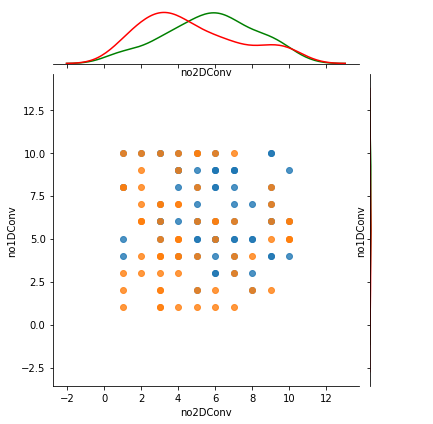

In [204]:
for x,y in itertools.combinations(lToTest, 2):
    x,y = 'no2DConv', 'no1DConv'
    topModels = dfModelMetrics.head(int(dfModelMetrics.shape[0]*.15))
    bottomModels = dfModelMetrics.tail(int(dfModelMetrics.shape[0]*.15))

    g = sns.JointGrid(x=x, y=y, data=dfModelMetrics)
    sns.regplot(topModels[x], topModels[y],ax=g.ax_joint, fit_reg=False)
    sns.regplot(bottomModels[x], bottomModels[y], ax=g.ax_joint, fit_reg=False)

    sns.distplot(topModels[x], kde=True, hist=False, color="g", ax=g.ax_marg_x)
    sns.distplot(bottomModels[x], kde=True, hist=False, color="r", ax=g.ax_marg_x, )
    sns.distplot(topModels[y], kde=True, hist=False, color="g", ax=g.ax_marg_y, vertical=True)
    sns.distplot(bottomModels[y], kde=True, hist=False, color="r", ax=g.ax_marg_y, vertical=True)

    plt.show()
    break


In [95]:
#sPermTest1='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/Dense47_2FeaturePermutations.p'
sPermTest1='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/Dense47_25FeaturePermutations.p'
pdFeatureImportance=pkl.load(open(sPermTest1, 'rb'))
pdFeatureImportance

,0
ROI016-ROI060,0.000266
ROI034-ROI105,0.000246
ROI033-ROI110,0.000238
ROI002-ROI015,0.000179
ROI018-ROI073,0.000172
ROI016-ROI120,0.000159
ROI014-ROI045,0.000154
ROI070-ROI102,0.000152
ROI010-ROI069,0.000152
ROI027-ROI078,0.000151


In [179]:
std=pdFeatureImportance.std()
mean=pdFeatureImportance.mean()

thresh = mean+std
thresh
(pdFuncFeatures>thresh).values

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

<IPython.core.display.Javascript object>


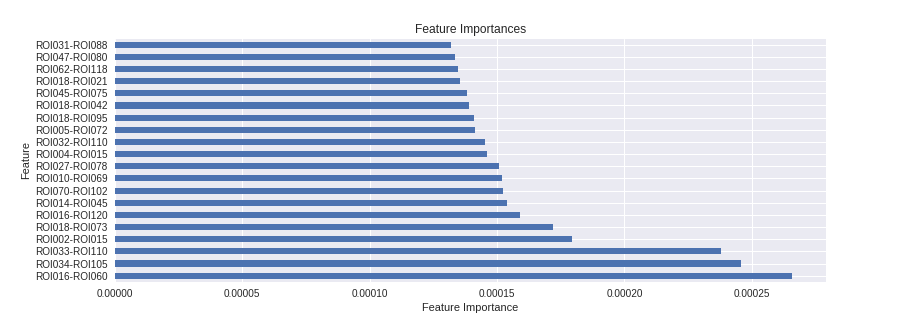

In [155]:
plt.style.use('seaborn')
pdFeatureImportance.head(20).plot(kind='barh', legend=False)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')

sPlotName='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/25PermutationsFeatureImportances.png'
plt.savefig(sPlotName)

<IPython.core.display.Javascript object>


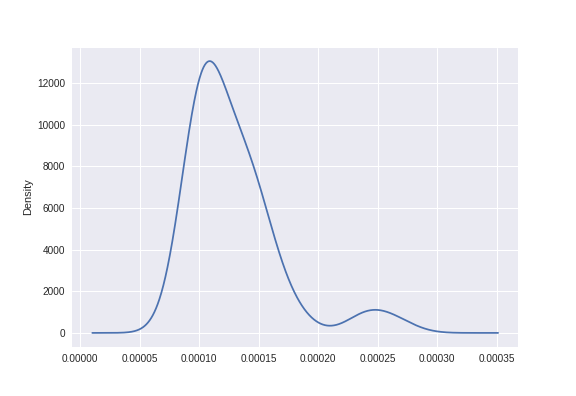

In [100]:
pdFeatureImportance.head(50).plot(kind='kde', legend=False)

In [186]:
pdFuncFeatures=pdFeatureImportance[['ROI' in sIndex for sIndex in pdFeatureImportance.index]]
flFunc = pdFuncFeatures[(pdFuncFeatures>thresh).values].sum()

In [187]:
pdAnatFeatures=pdFeatureImportance[['anatomy' in sIndex for sIndex in pdFeatureImportance.index]]
flAnat = pdAnatFeatures[(pdAnatFeatures>thresh).values].sum()

In [215]:
# 1st anatomical feature
pdFeatureImportance.index.get_loc('anatomy_BrainSegVolNotVentSurf')

2020

In [218]:
len(pdFeatureImportance.index)

7746

In [188]:
pdConfounders = pdFeatureImportance
indxFunc=pdFuncFeatures.index
indxAnat=pdAnatFeatures.index
pdConfounders=pdConfounders.drop(indxFunc, axis=0)
pdConfounders=pdConfounders.drop(indxAnat, axis=0)
flConf = pdConfounders[(pdConfounders>thresh).values].sum()

In [217]:
# 1st confounder
pdFeatureImportance.index.get_loc('Site13')

476

In [144]:
#pie/pie.sum()

array([[9.97451621e-01],
       [7.73487746e-04],
       [1.77489085e-03]])

In [191]:
normpie=np.array([flFunc/len(pdFuncFeatures), flAnat/len(pdAnatFeatures), flConf/len(pdConfounders)])

In [192]:
normpie/normpie.sum()

array([[0.83268174],
       [0.        ],
       [0.16731826]])

In [221]:
flStd=pdFeatureImportance.std()

In [222]:
flMean=pdFeatureImportance.mean()

In [223]:
pdFeatureImportanceNorm=pdFeatureImportance.subtract(flMean)
pdFeatureImportanceNorm=pdFeatureImportance.divide(flStd)
pdFeatureImportanceNorm

,0
ROI016-ROI060,10.145904
ROI034-ROI105,9.381839
ROI033-ROI110,9.073274
ROI002-ROI015,6.847199
ROI018-ROI073,6.568022
ROI016-ROI120,6.061094
ROI014-ROI045,5.877424
ROI070-ROI102,5.818650
ROI010-ROI069,5.803956
ROI027-ROI078,5.759876


<IPython.core.display.Javascript object>


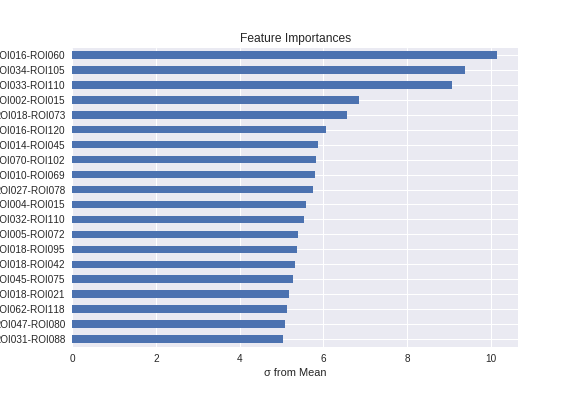

In [236]:
pdFeatureImportanceNorm.iloc[::-1].tail(20).plot(kind='barh', legend=False)

plt.xlabel('\u03C3 from Mean')
plt.ylabel('Feature')
plt.title('Feature Importances')

sPlotName='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/25PermutationsFeatureImportances.png'
plt.savefig(sPlotName, bbox_inches='tight')